## OpenCV
   #### Computer Vision Winter Semester 2020/2021 by Clemens Spielvogel
   
OpenCV is an open source library for C++ focusing not only on handling of imaging data but also provides an extensive set of computer vision algorithms. The library also offers bindings for python. The main functionalities include image data handling and processing, video analysis, camera calibration and 3D reconstruction, 2D image feature extraction, object recognition, GUI capabilities and video I/O functionalities. Also, OpenCV is equipped with a number of traditional machine learning algorithms.
   
Installation (Ubuntu)
* $ pip install opencv-python

Resources
* C++ Documentation: https://docs.opencv.org/master/ (not all C++ functionalities are available in python)
* Python Wrapper Documentation: https://madebyollin.github.io/opencv-python-docs/ (somewhat impractical)
* Tutorials: https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_tutorials.html


### Importing

In [1]:
# Importing the OpenCV library
import cv2

print(cv2.__version__)

3.3.0


### Input / Output

In [2]:
# Load an image
img = cv2.imread("Data/robotic_kitten.png")

# Display image type
print(type(img))

# Show image
cv2.imshow("Robotic Kitten", img) # First parameter is the window title
cv2.waitKey(0)
cv2.destroyAllWindows()

<class 'numpy.ndarray'>


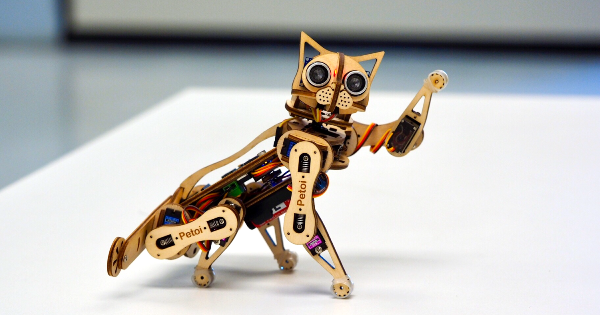

In [3]:
# To display an image in jupyter, use PIL
from PIL import Image
from IPython.display import display

def display_array(array):
    if array.ndim > 2: # Check whether image is colored
        array = cv2.cvtColor(array.astype("uint8"), cv2.COLOR_BGR2RGB) # Swap BGR to RGB
    pil_img = Image.fromarray(array)
    display(pil_img)

display_array(img)

In [4]:
# Save an image
cv2.imwrite("Data/robotic_kitten_saved.png", img)

# Verify saving
import os
print("Saved image:", "robotic_kitten_saved.png" in os.listdir("Data"))

# Remove saved copy from disk
os.remove("Data/robotic_kitten_saved.png")

Saved image: True


### Working with color channels

In [5]:
# Loading image without color
gray_img = cv2.imread("Data/robotic_kitten.png", 0)
print(gray_img.shape)

# Loading image in color
color_img = cv2.imread("Data/robotic_kitten.png", 1)
print(color_img.shape)

(315, 600)
(315, 600, 3)


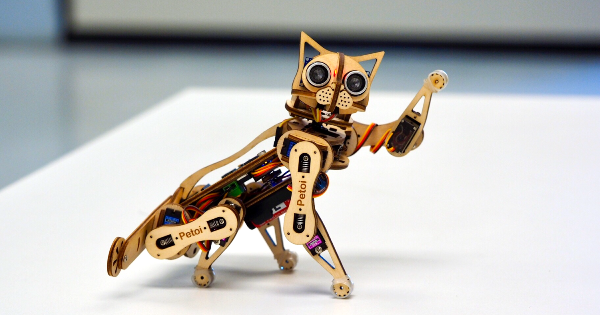

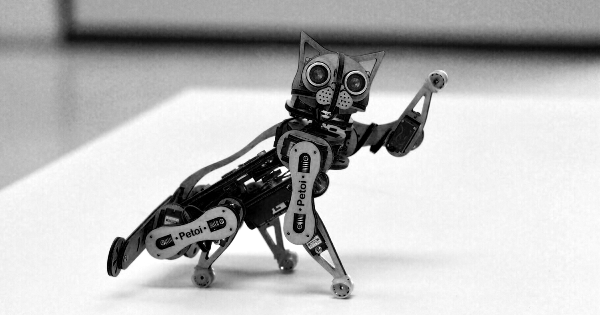

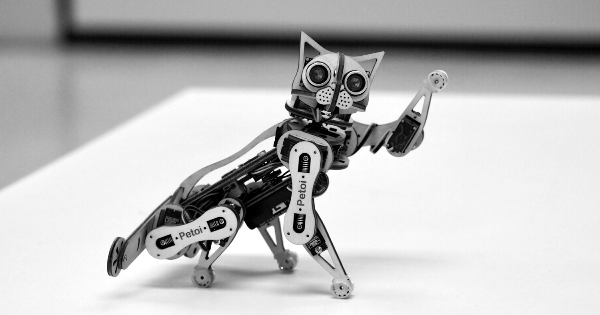

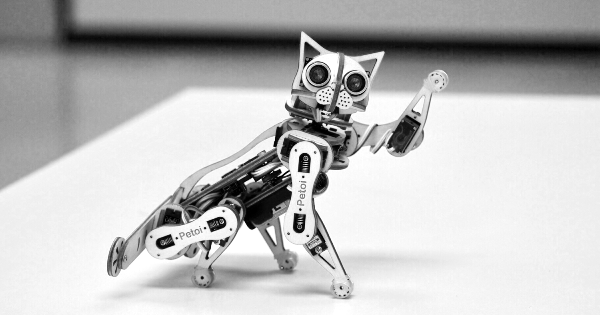

In [6]:
# Splitting into color channels
b, g, r = cv2.split(img) # Same as b, g,r = img[:, :, 0], img[:, :, 1], img[:, :, 2]

# Merging color channels
img = cv2.merge((b, g, r)) # Same as img = np.stack([b, g, r], axis=2)

# Display merged channels
display_array(img)

# Display individual channels
b_pil = Image.fromarray(b)
display(b_pil)
g_pil = Image.fromarray(g)
display(g_pil)
r_pil = Image.fromarray(r)
display(r_pil)

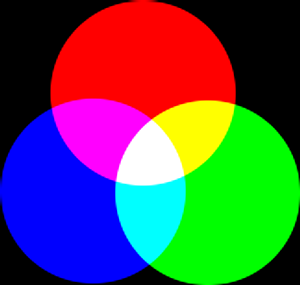

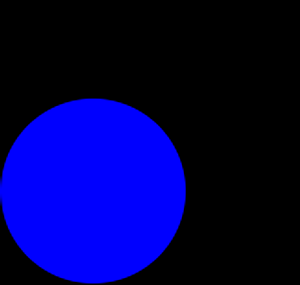

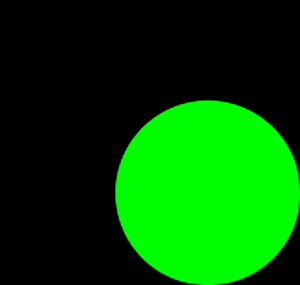

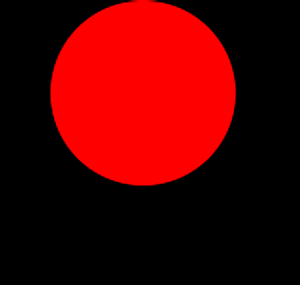

In [7]:
# Display channels in color
import numpy as np

img = cv2.imread("Data/rgb.png")
b, g, r = cv2.split(img)

empty_channel = np.zeros((b.shape))

blue_img = np.stack([b, empty_channel, empty_channel], axis=2)
green_img = np.stack([empty_channel, g, empty_channel], axis=2)
red_img = np.stack([empty_channel, empty_channel, r], axis=2)

display_array(img)
display_array(blue_img)
display_array(green_img)
display_array(red_img)

In [8]:
# OpenCV uses BGR instead of RGB
from PIL import Image
import numpy as np

cv2_img = cv2.imread("Data/robotic_kitten.png")
pil_img = Image.open("Data/robotic_kitten.png")
array_from_pil = np.array(pil_img)[:, :, :3]

print(cv2_img.shape)
print(array_from_pil.shape)

# Comparing the color values of one pixel
print(cv2_img[0][0] == array_from_pil[0][0])

# Comparing individual color channels
print(np.all(cv2_img[:, :, 0] == array_from_pil[:, :, 2]))
print(np.all(cv2_img[:, :, 1] == array_from_pil[:, :, 1]))
print(np.all(cv2_img[:, :, 2] == array_from_pil[:, :, 0]))

(315, 600, 3)
(315, 600, 3)
[False  True False]
True
True
True


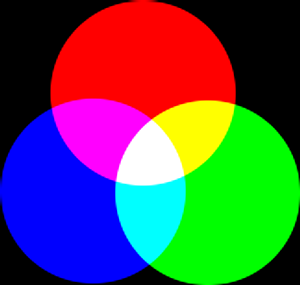

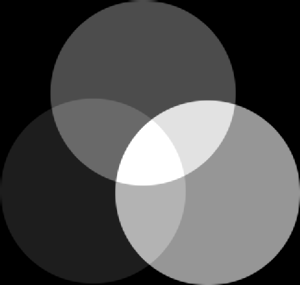

In [9]:
# Converting to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

display_array(img)
display_array(img_gray)

### Transformations

In [10]:
# Load image
img = cv2.imread("Data/robotic_kitten.png")

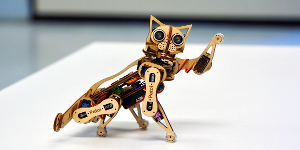

In [11]:
# Resize an image
resized_img = cv2.resize(img,(300, 150), interpolation = cv2.INTER_CUBIC)

display_array(resized_img)

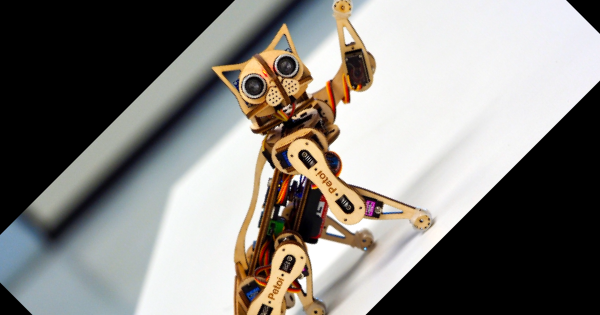

In [12]:
# Rotate an image
rows,cols = img.shape[:2]

rot_matrix = cv2.getRotationMatrix2D(center=(cols/2, rows/2), angle=45, scale=1)
rot_img = cv2.warpAffine(img, rot_matrix, (cols, rows))

display_array(rot_img)

### Filtering

Original:


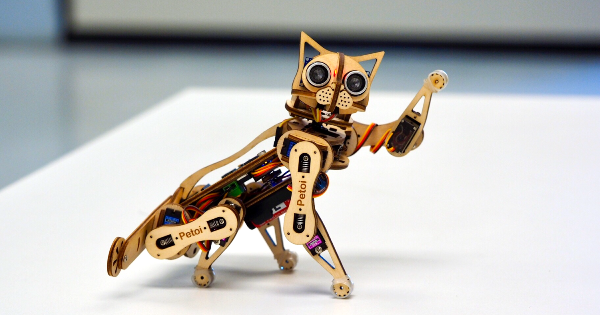

With filter applied:

[[ 0 -1  0]
 [-1  5 -1]
 [ 0 -1  0]]


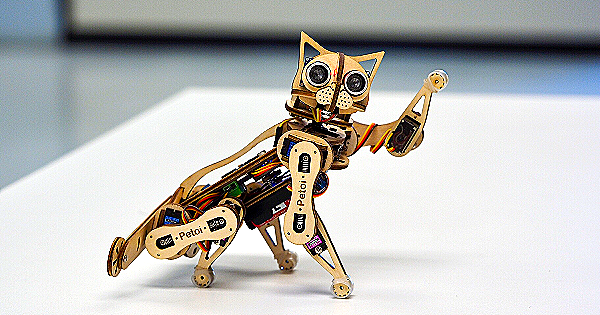

In [13]:
# Apply a custom filter to an image
filter1 = np.array([[0, -1, 0], 
                    [-1, 5, -1], 
                    [0, -1, 0]])

filtered_img = cv2.filter2D(img, -1, filter1)

print("Original:")
display_array(img)

print("With filter applied:\n")
print(filter1)
display_array(filtered_img)

OpenCV offers a wide range of predefined filters:
    https://docs.opencv.org/3.0-beta/modules/imgproc/doc/filtering.html

With predefined gaussian filter applied:



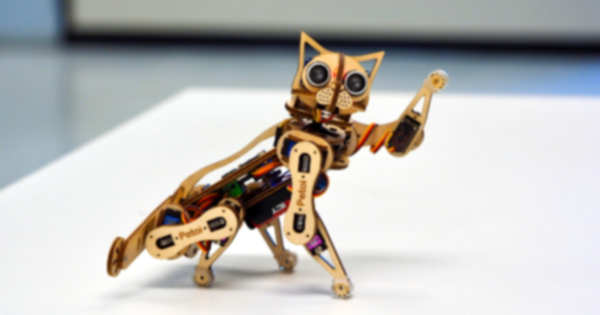

With custom gaussian filter applied:

[[0.00392157 0.01568627 0.02745098 0.01568627 0.00392157]
 [0.01568627 0.0627451  0.10196078 0.0627451  0.01568627]
 [0.02745098 0.10196078 0.16078431 0.10196078 0.02745098]
 [0.01568627 0.0627451  0.10196078 0.0627451  0.01568627]
 [0.00392157 0.01568627 0.02745098 0.01568627 0.00392157]]


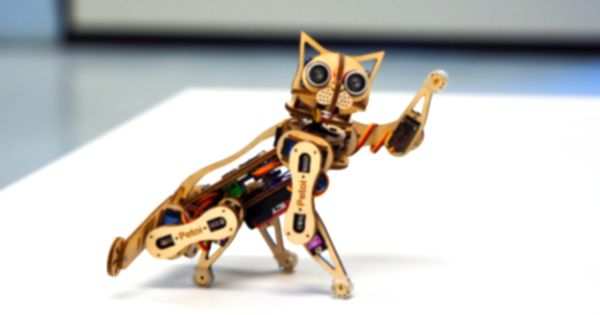

In [14]:
# Using predefined filters

# Creating a custom filter
gaussian_filter = np.array([[1, 4, 7, 4, 1], 
                            [4, 16, 26, 16, 4], 
                            [7, 26, 41, 26, 7],
                            [4, 16, 26, 16, 4], 
                            [1, 4, 7, 4, 1]]) / 255

# Apply filter
filtered_predefined = cv2.GaussianBlur(img,(5, 5), 0)
filtered_custom = cv2.filter2D(img, -1, gaussian_filter)

print("With predefined gaussian filter applied:\n")
display_array(filtered_predefined)

print("With custom gaussian filter applied:\n")
print(gaussian_filter)
display_array(filtered_custom)

### Note

In [15]:
# When loading an image using cv2.imread() its best practice to check if your image has been loaded successfully 
# as there will not be an error when the given path does not exist

invalid_path = "invalid_path.png"
img = cv2.imread(invalid_path)

if img is None:
    raise Exception("Error: Cannot load image from path '{}'".format(invalid_path))

Exception: Error: Cannot load image from path 'invalid_path.png'